In [5]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
# Install TensorFlow if not available
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models
except ModuleNotFoundError:
    print("TensorFlow not found. Installing TensorFlow...")
    os.system('pip install tensorflow')
    import tensorflow as tf
    from tensorflow.keras import layers, models

In [15]:
# Data Preparation
labels = ['PNEUMONIA', 'NORMAL']
img_size = 299
BATCH_SIZE = 16 
DATASET_PATH = 'D:/archive (1)/chest_xray/chest_xray/train'

In [17]:
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"Error: Path '{path}' not found. Please check the dataset location.")
            return np.array([])
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = Image.open(os.path.join(path, img)).convert('L')
                resized_arr = img_arr.resize((img_size, img_size))
                data.append([np.array(resized_arr), class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
import os
import numpy as np
from PIL import Image

# Define dataset labels and image size
labels = ["Normal", "Pneumonia"]
img_size = 299  # Resize to 224x224 for VGG16

# Define dataset path
data_dir = r'D:/archive (1)/chest_xray/chest_xray/train'

# Run the function
dataset = get_data(data_dir)

# Check the output
print(f"Loaded {len(dataset)} images")
print(f"First image shape: {dataset[0][0].shape}, Label: {dataset[0][1]}")


In [42]:
import os
import numpy as np
from PIL import Image

def get_data(data_dir):
    data = []
    labels = ["NORMAL", "PNEUMONIA"]  # Ensure labels match folder names exactly
    img_size = 299  # Resize images

    total_images = 0  # Count total number of images
    processed_images = 0  # Count processed images

    for label in labels:
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"Error: Path '{path}' not found. Please check the dataset location.")
            return np.array([])
        
        class_num = labels.index(label)  # 0 for Normal, 1 for Pneumonia
        
        for img in os.listdir(path):
            if img.startswith('.'):  # Skip hidden system files like .DS_Store
                continue
            
            total_images += 1
            
            try:
                img_path = os.path.join(path, img)
                img_arr = Image.open(img_path).convert('L')  # Convert to grayscale
                resized_arr = img_arr.resize((img_size, img_size))  # Resize
                data.append([np.array(resized_arr), class_num])
                processed_images += 1

                if processed_images % 100 == 0:  # Log every 100 images processed
                    print(f"Processed {processed_images}/{total_images} images")

            except Exception as e:
                print(f"Error loading {img}: {e}")

    return np.array(data, dtype=object)  # Use dtype=object to prevent shape issues

# Define dataset path
data_dir = r"D:/archive (1)/chest_xray/chest_xray/train"

# Run the function
dataset = get_data(data_dir)

# Check the output
if len(dataset) > 0:
    print(f" Loaded {len(dataset)} images")
    print(f" First image shape: {dataset[0][0].shape}, Label: {dataset[0][1]}")
else:
    print(" No images loaded. Check dataset path!")


Processed 100/100 images
Processed 200/200 images
Processed 300/300 images
Processed 400/400 images
Processed 500/500 images
Processed 600/600 images
Processed 700/700 images
Processed 800/800 images
Processed 900/900 images
Processed 1000/1000 images
Processed 1100/1100 images
Processed 1200/1200 images
Processed 1300/1300 images
Processed 1400/1400 images
Processed 1500/1500 images
Processed 1600/1600 images
Processed 1700/1700 images
Processed 1800/1800 images
Processed 1900/1900 images
Processed 2000/2000 images
Processed 2100/2100 images
Processed 2200/2200 images
Processed 2300/2300 images
Processed 2400/2400 images
Processed 2500/2500 images
Processed 2600/2600 images
Processed 2700/2700 images
Processed 2800/2800 images
Processed 2900/2900 images
Processed 3000/3000 images
Processed 3100/3100 images
Processed 3200/3200 images
Processed 3300/3300 images
Processed 3400/3400 images
Processed 3500/3500 images
Processed 3600/3600 images
Processed 3700/3700 images
Processed 3800/3800

LOADING DATASET

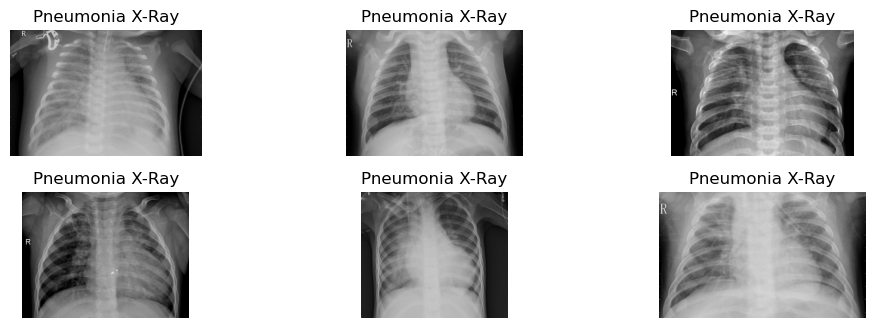

In [52]:
import os
import matplotlib.pyplot as plt

# directory
pneumonia_dir = r'D:\archive (1)\chest_xray\chest_xray\train\PNEUMONIA'

# List all files in the pneumonia directory
pneumonia = os.listdir(pneumonia_dir)

# Filter the list to only include valid image files
image_files = [file for file in pneumonia if file.endswith(('.jpg', '.jpeg', '.png'))]

# Check if there are at least 6 images to display
if len(image_files) >= 6:
    plt.figure(figsize=(10, 5))

    for i in range(6):
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(pneumonia_dir, image_files[i])  
        img = plt.imread(img_path)  
        plt.imshow(img, cmap='gray')  
        plt.axis('off')  
        plt.title("Pneumonia X-Ray")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
else:
    print("Not enough valid images found in the directory.")


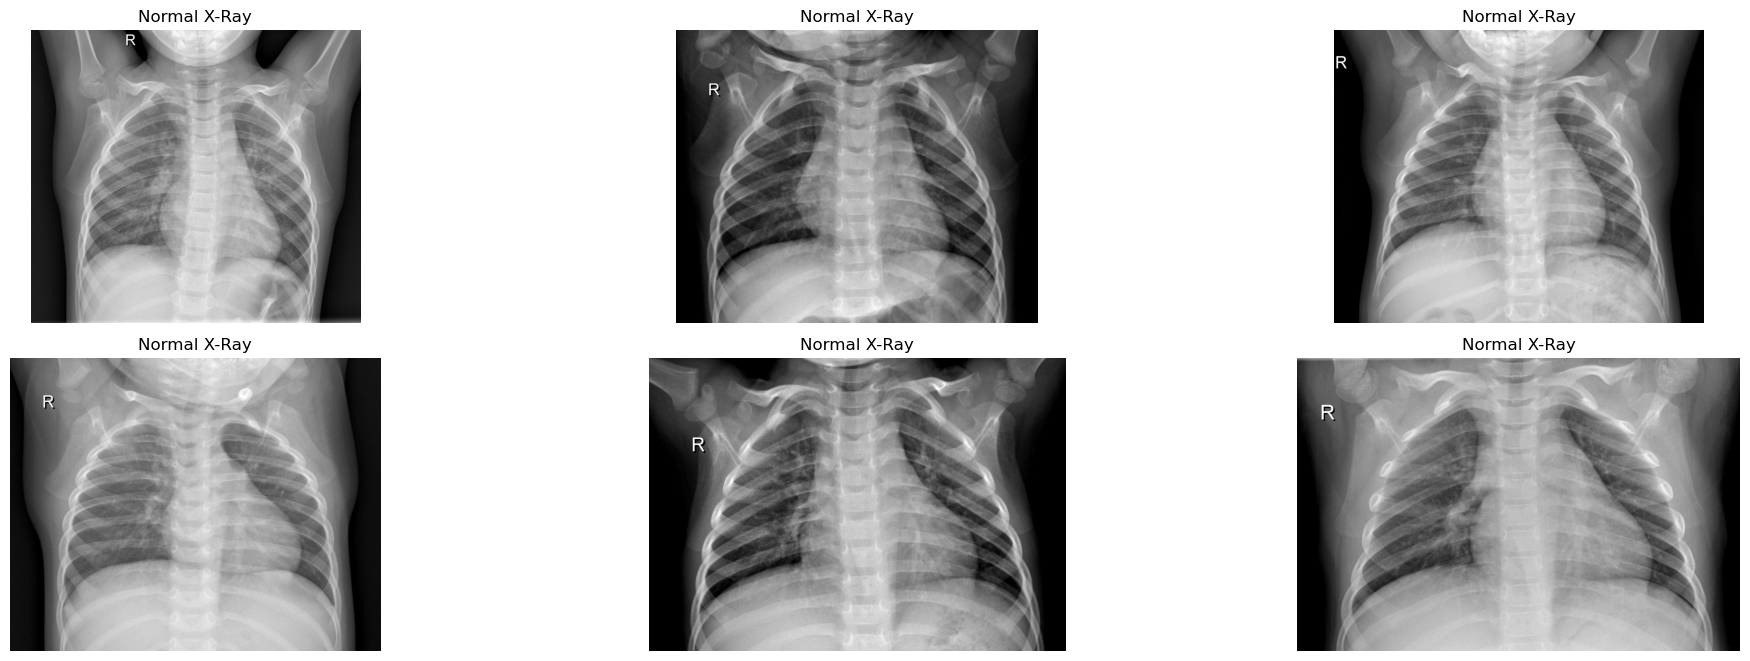

In [61]:
import os
import matplotlib.pyplot as plt

normal_dir = r'D:\archive (1)\chest_xray\chest_xray\train\NORMAL'

# List all files in the normal directory
normal_files = os.listdir(normal_dir)

# Filter the list to only include valid image files (optional, in case there are non-image files)
image_files = [file for file in normal_files if file.endswith(('.jpg', '.jpeg', '.png'))]

# Ensure that there are at least 6 valid images to plot
if len(image_files) >= 6:
    plt.figure(figsize=(20, 10))

    for i in range(6):
        plt.subplot(3, 3, i + 1)
        img_path = os.path.join(normal_dir, image_files[i]) 
        img = plt.imread(img_path)  
        plt.imshow(img, cmap='gray')  
        plt.axis('off')  
        plt.title("Normal X-Ray")

    plt.tight_layout()  
    plt.show()
else:
    print("Not enough valid images found in the directory.")


In [69]:
import tensorflow as tf

# Define dataset path
data_dir = "D:/archive (1)/chest_xray/chest_xray/train"

# Load dataset using TensorFlow
train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(299, 299),
    batch_size=16
)

# Check if dataset has elements
for images, labels in train.take(1):
    print(labels.numpy())  # Print labels of first batch



Found 5216 files belonging to 2 classes.
[1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0]


C:\Users\dil\AppData\Local\Temp\ipykernel_22652\2629566525.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=balanced_labels, palette=custom_colors)


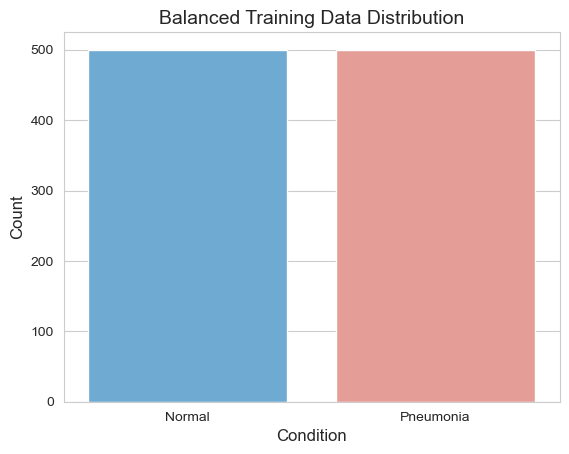

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Separate lists for Normal and Pneumonia
normal_labels = []
pneumonia_labels = []

# Process only a limited number of batches
for images, lbls in train.take(200):  # Process first 200 batches
    for label in lbls.numpy():
        if label == 0 and len(normal_labels) < 500:  # Adjust count if needed
            normal_labels.append("Normal")
        elif label == 1 and len(pneumonia_labels) < 500:
            pneumonia_labels.append("Pneumonia")

    # Stop if both classes reach the same count
    if len(normal_labels) == len(pneumonia_labels) and len(normal_labels) >= 500:
        break

# Merge the balanced labels
balanced_labels = normal_labels + pneumonia_labels

# Set plot style
sns.set_style('whitegrid')
custom_colors = ['#5DADE2', '#F1948A']  # Blue for Pneumonia, Pink for Normal

# Create count plot
sns.countplot(x=balanced_labels, palette=custom_colors)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Balanced Training Data Distribution', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


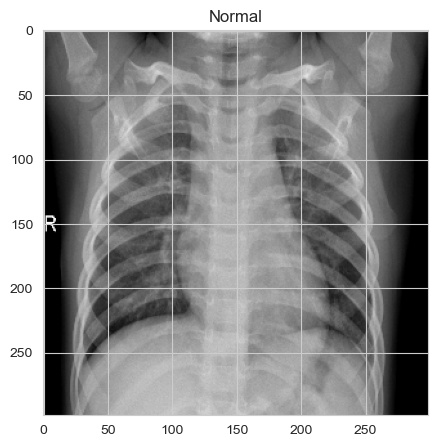

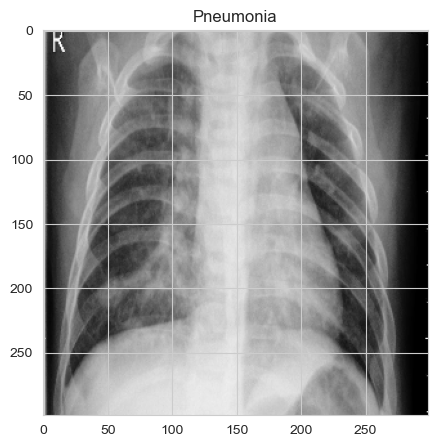

In [130]:
import matplotlib.pyplot as plt

# Visualize one "normal" image
for images, lbls in train.take(1):
    # Find a "normal" image (label == 0)
    for i in range(len(lbls)):
        if lbls[i].numpy() == 0:  # Normal class
            # Normalize image if required
            img = images[i] / 255.0
            plt.figure(figsize=(5, 5))
            plt.imshow(img, cmap='gray')
            plt.title('Normal')
            plt.show()
            break  # Stop after showing the first normal image

# Visualize one "pneumonia" image
for images, lbls in train.take(1):
    # Find a "pneumonia" image (label == 1)
    for i in range(len(lbls)):
        if lbls[i].numpy() == 1:  # Pneumonia class
            # Normalize image if required
            img = images[i] / 255.0
            plt.figure(figsize=(5, 5))
            plt.imshow(img, cmap='gray')
            plt.title('Pneumonia')
            plt.show()
            break  # Stop after showing the first pneumonia image


In [184]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [190]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation generator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.8, 1.2]
    
)




In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained VGG16 (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze VGG16 layers

# Build classifier on top
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,058,625 (248.18 MB)

 Trainable params: 50,343,937 (192.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    r"D:/archive (1)/chest_xray/chest_xray/test",   # ✅ Change this to your test dataset path
    target_size=(299, 299),
    batch_size=16,
    class_mode='binary'
)

x_test, y_test = [], []
for i in range(len(test_data)):
    img, label = test_data[i]  
    x_test.extend(img)  
    y_test.extend(label)

x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

print("x_test shape:", x_test_np.shape)
print("y_test shape:", y_test_np.shape)


Found 624 images belonging to 2 classes.
x_test shape: (624, 299, 299, 3)
y_test shape: (624,)


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Epoch 1/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 1922s 6s/step - accuracy: 0.8297 - loss: 0.3564 - val_accuracy: 0.7500 - val_loss: 0.5613
Epoch 2/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 1512s 5s/step - accuracy: 0.9143 - loss: 0.1943 - val_accuracy: 0.6250 - val_loss: 0.8616
Epoch 3/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 1545s 5s/step - accuracy: 0.9409 - loss: 0.1527 - val_accuracy: 0.8125 - val_loss: 0.5624
Epoch 4/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 1781s 5s/step - accuracy: 0.9448 - loss: 0.1480 - val_accuracy: 0.8125 - val_loss: 0.6506
Epoch 5/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 1651s 5s/step - accuracy: 0.9485 - loss: 0.1309 - val_accuracy: 0.6250 - val_loss: 0.9732
Epoch 6/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 1589s 5s/step - accuracy: 0.9507 - loss: 0.1263 - val_accuracy: 0.7500 - val_loss: 0.7964
39/39 ━━━━━━━━━━━━━━━━━━━━ 181s 5s/step - accuracy: 0.7818 - loss: 0.6490

Test Loss: 0.5723
Test Accuracy

C:\Users\dil\AppData\Local\Temp\ipykernel_21992\664791045.py:76: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(epochs_range, train_acc, 'go-', marker='o', label='Train Accuracy')
C:\Users\dil\AppData\Local\Temp\ipykernel_21992\664791045.py:77: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(epochs_range, val_acc, 'ro-', marker='o', label='Val Accuracy')
C:\Users\dil\AppData\Local\Temp\ipykernel_21992\664791045.py:85: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(epochs_range, train_loss, 'g-o', marker='o', label='Train Loss')
C:\Users\dil\AppData\Local\Temp\ipykernel_21992\664791045.py:86: UserWarning: marker is redu

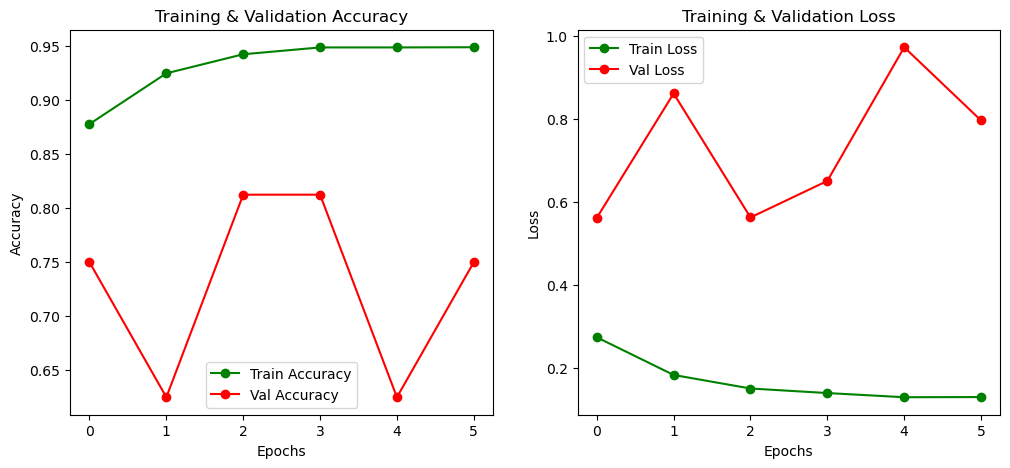

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = (299, 299)
BATCH_SIZE = 16
EPOCHS = 6

# Load datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\archive (1)\chest_xray\train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\archive (1)\chest_xray\val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\archive (1)\chest_xray\test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Normalize images using Rescaling layer
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

# Load Pretrained VGG16 Model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False  # Freeze VGG16 layers

# Define Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Better than Flatten()
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes (Normal & Pneumonia)
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

# Evaluate Model
loss, acc = model.evaluate(test_data)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot Training Results
epochs_range = range(EPOCHS)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, 'go-', marker='o', label='Train Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', marker='o', label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, 'g-o', marker='o', label='Train Loss')
plt.plot(epochs_range, val_loss, 'r-o', marker='o', label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
import numpy as np

# Make predictions on test data
y_pred_probs = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Show first 15 predicted class labels
print("First 15 predicted classes:", y_pred_classes[:15])


39/39 ━━━━━━━━━━━━━━━━━━━━ 224s 6s/step
First 15 predicted classes: [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0]


39/39 ━━━━━━━━━━━━━━━━━━━━ 209s 5s/step
                     precision    recall  f1-score   support

   Normal (Class 0)       0.38      0.18      0.24       234
Pneumonia (Class 1)       0.63      0.83      0.71       390

           accuracy                           0.58       624
          macro avg       0.50      0.50      0.48       624
       weighted avg       0.53      0.58      0.53       624


Specificity for each class:
Class 0: 0.8256
Class 1: 0.1752


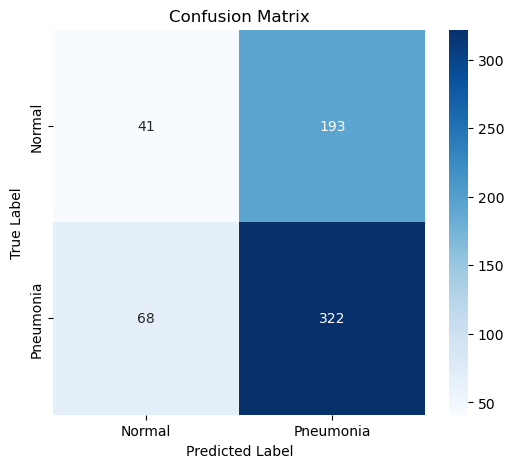

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Extract true labels from test_data
y_true = np.concatenate([y for x, y in test_data], axis=0)

# Get predicted classes
y_pred = np.argmax(model.predict(test_data), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate specificity for each class
specificity = {}
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity[f'Class {i}'] = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print classification report
report = classification_report(y_true, y_pred, target_names=['Normal (Class 0)', 'Pneumonia (Class 1)'])
print(report)

# Print specificity values
print("\nSpecificity for each class:")
for class_name, spec in specificity.items():
    print(f"{class_name}: {spec:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


39/39 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step


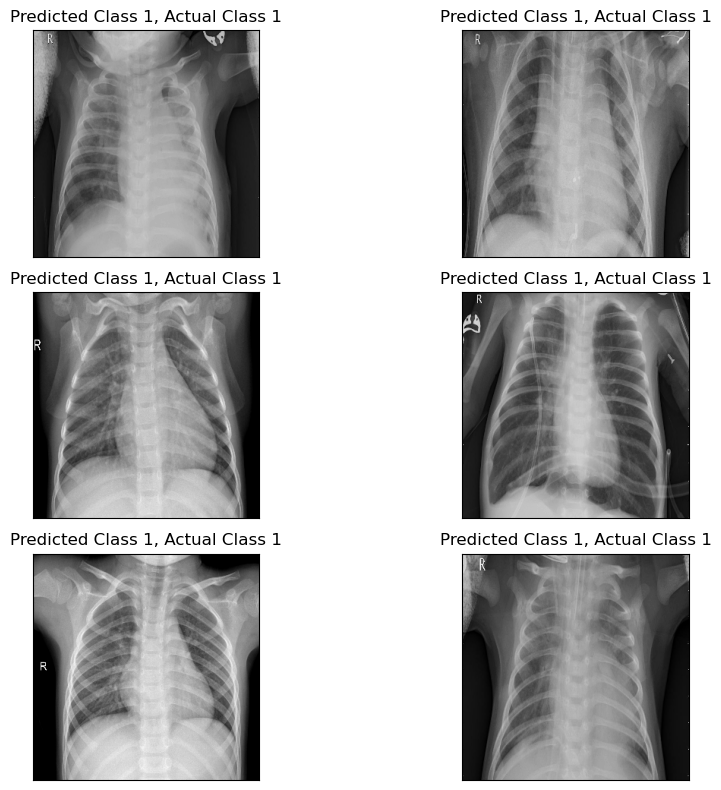

In [76]:
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(test_data)
predictions = np.argmax(y_pred_probs, axis=1)

# Extract true labels from test_data
y_test = np.concatenate([y for x, y in test_data], axis=0)

# Extract test images
x_test = np.concatenate([x for x, y in test_data], axis=0)

# Find correctly predicted indices
correct = np.where(predictions == y_test)[0]

# Plot first 6 correctly predicted grayscale images
plt.figure(figsize=(10, 8))

for i, c in enumerate(correct[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

    # Convert to grayscale if needed
    if x_test[c].shape[-1] == 1:
        plt.imshow(x_test[c].reshape(x_test[c].shape[0], x_test[c].shape[1]), cmap='gray')
    else:
        plt.imshow(np.mean(x_test[c], axis=-1), cmap='gray')
    
    plt.title(f"Predicted Class {predictions[c]}, Actual Class {y_test[c]}")

plt.show()


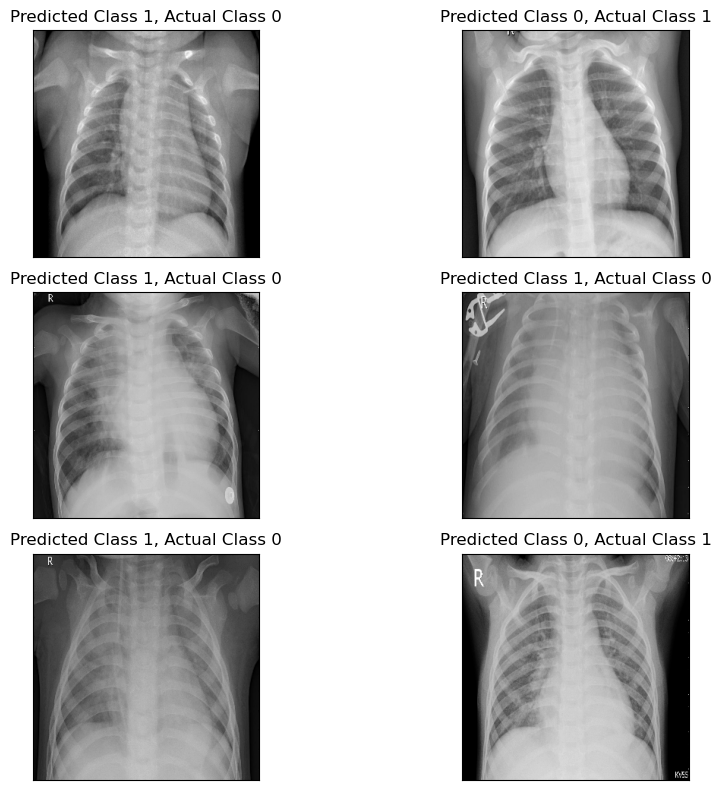

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Get incorrect indices
incorrect = np.where(predictions != y_test)[0]

# Plot first 6 incorrect predictions
plt.figure(figsize=(10, 8))

for i, c in enumerate(incorrect[:6]):
    plt.subplot(3, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

    if x_test[c].shape[-1] == 1:
        plt.imshow(x_test[c].reshape(x_test[c].shape[0], x_test[c].shape[1]), cmap='gray')
    else:
        plt.imshow(np.mean(x_test[c], axis=-1), cmap='gray')

    plt.title(f"Predicted Class {predictions[c]}, Actual Class {y_test[c]}")

plt.show()


In [80]:
model.save("my_model.keras")
